#Support Vector Machine (SVM) and Logistic Regression for Digit Recognition
##Name: SIMRAN ANAND
##Registration Number: 19BCD7243

##Importing MNIST dataset (full database)

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)


X = mnist["data"]
y = mnist["target"].astype(np.uint8)

##Split into training and test

In [2]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

##Learning and modelling

In [3]:
from sklearn.svm import LinearSVC

In [4]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

## Prediction and scoring

In [5]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8733

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [8]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [9]:
from sklearn.svm import SVC

In [10]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9226833333333333

In [11]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##Score against training and test data

In [12]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

##Conclusion
###This lab assignment shows performing multi-class classification using SVM using one-vs-all technique. When run on MNIST DB, the accuracy is 95%.

##Logistic Regression on MNIST Dataset to recognize handwritten digits

## Importing MNIST dataset (full database)

In [13]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

CPU times: user 21.1 s, sys: 102 ms, total: 21.2 s
Wall time: 21.2 s


In [14]:
type(mnist)

sklearn.utils.Bunch

In [15]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(numpy.ndarray, dict, list, numpy.ndarray)

In [16]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

##Preview some images

In [17]:
mnist.target[0]

'5'

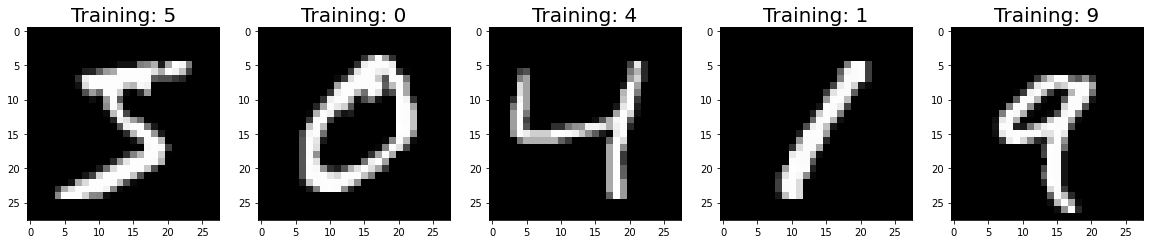

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], 
                                           mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20);

In [21]:
mnist.target.astype('int')

array([5, 0, 4, ..., 4, 5, 6])

##Split into training and test

In [22]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [23]:
X2_train.shape, X2_test.shape

((60000, 784), (10000, 784))

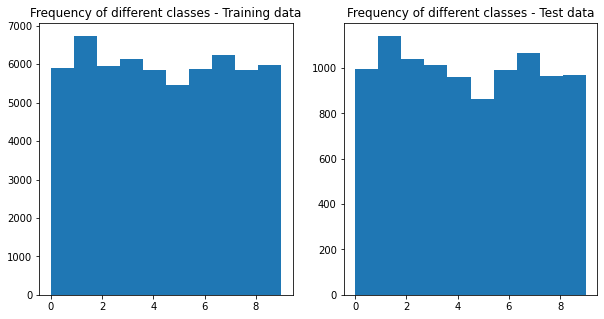

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y2_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y2_test);
plt.title('Frequency of different classes - Test data');

##Learning and modelling

In [26]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )
clf2

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=5, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=2,
                   warm_start=False)

In [27]:
%%time
clf2.fit(X2_train, y2_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 48 epochs took 205 seconds
CPU times: user 3min 25s, sys: 133 ms, total: 3min 25s
Wall time: 3min 24s


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  3.4min finished


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=5, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=2,
                   warm_start=False)

In [28]:
clf2.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
clf2.coef_.shape

(10, 784)

In [30]:
clf2.coef_[1].round(3) # prints weights for 8x8 image for class 0

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,
       -0.001, -0.001, -0.001,  0.   ,  0.002,  0.004,  0.001,  0.002,
        0.002,  0.001, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.001, -0.001, -0.002, -0.002, -0.003,
        0.001,  0.002, -0.001,  0.001,  0.002,  0.   , -0.002,  0.   ,
       -0.001, -0.001, -0.001, -0.001, -0.001, -0.   , -0.   ,  0.   ,
      

In [31]:
clf2.intercept_ # for 10 classes - this is a One-vs-All classification

array([-1.16116131e-04,  1.38659532e-04,  1.16407386e-04, -2.39613476e-04,
        7.06028950e-05,  8.62021174e-04, -4.06493126e-05,  2.76171826e-04,
       -8.78696919e-04, -1.88786975e-04])

In [32]:
clf2.n_iter_[0] # num of iterations before tolerance was reached

48

## Visualize coefficients as an image

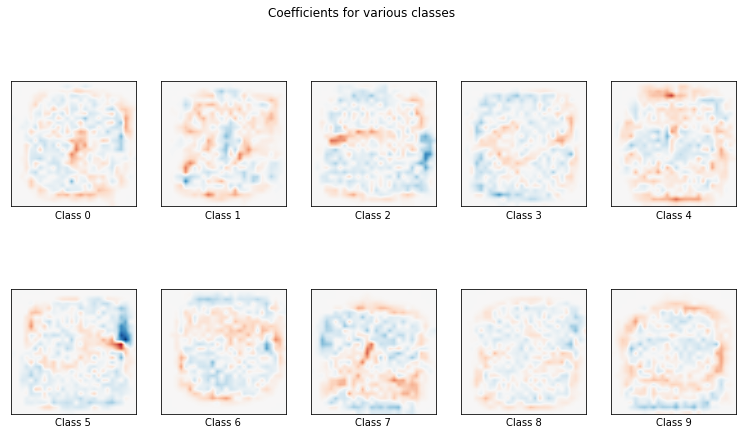

In [33]:
coef = clf2.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

## Prediction and scoring
Now predict on unknown dataset and compare with ground truth

In [34]:
print(clf2.predict(X2_test[0:9]))
print(y2_test[0:9])

[0 4 1 2 4 7 7 1 1]
[0 4 1 2 7 9 7 1 1]


##Score against training and test data

In [35]:
clf2.score(X2_train, y2_train) # training score

0.9374333333333333

In [36]:
score2 = clf2.score(X2_test, y2_test) # test score
score2

0.9192

## Test Score: 0.9191 or 91%

##Confusion matrix


In [38]:
from sklearn import metrics

In [39]:
predictions2 = clf2.predict(X2_test)

cm = metrics.confusion_matrix(y_true=y2_test, 
                         y_pred = predictions2, 
                        labels = clf2.classes_)
cm

array([[ 967,    0,    1,    2,    1,    9,    9,    0,    7,    0],
       [   0, 1114,    5,    3,    1,    5,    0,    4,    7,    2],
       [   3,   13,  931,   18,   11,    1,   15,   10,   34,    4],
       [   1,    5,   33,  894,    0,   26,    2,   12,   27,   13],
       [   1,    2,    5,    1,  897,    1,   11,    9,    7,   28],
       [  10,    2,    6,   30,    9,  747,   16,    6,   30,    7],
       [   7,    3,    6,    0,   11,   17,  939,    1,    5,    0],
       [   2,    5,   14,    2,   12,    2,    1,  981,    4,   41],
       [   4,   17,    9,   18,    6,   25,    9,    2,  861,   12],
       [   4,    5,    6,   10,   35,    7,    2,   31,    8,  861]])

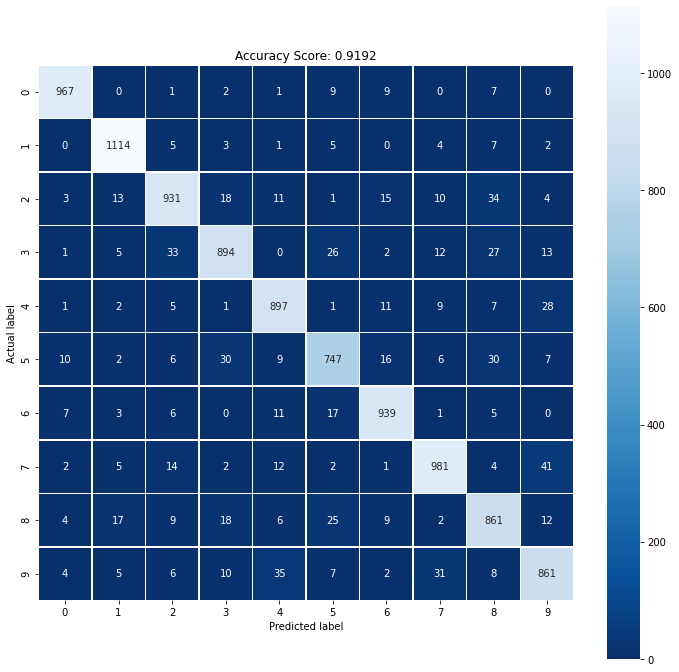

In [40]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title);

#Conclusion
This lab assignment shows performing multi-class classification using logistic regression using one-vs-all technique.
When run on MNIST DB, the accuracy is 91%.

##Hence, accuracy given by SVM is 95% and is higher than accuracy given by Logistic Regression which is 91%